#  Importing the libraries and loading the iris dataset

In [1]:
#Importing the libraries
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [2]:
# loading the iris dataset
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Preprocessing

In [4]:
#Analyzing the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Outlier Analysis

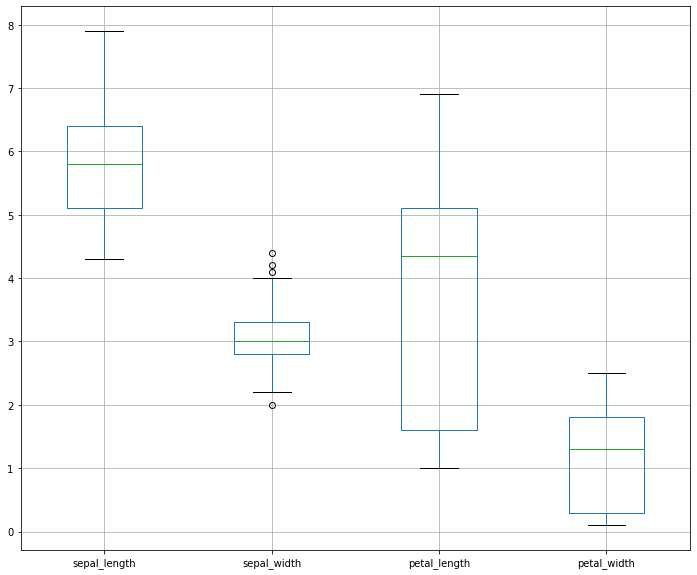

In [6]:
df.boxplot(figsize=(12,10))
plt.show()

From the above plot it has been observed that only 'sepal_width' column has 4 outliers.

# Data Visualization

Univariate Analysis

In [7]:
df_setosa=df.loc[df['species']=='setosa']
df_virginica=df.loc[df['species']=='virginica']
df_versicolor=df.loc[df['species']=='versicolor']

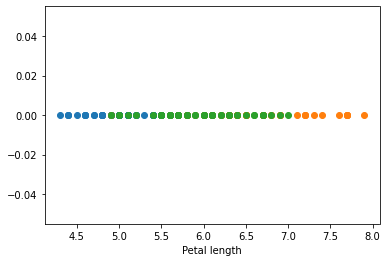

In [8]:
plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'],np.zeros_like(df_virginica['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'],np.zeros_like(df_versicolor['sepal_length']),'o')
plt.xlabel('Petal length')
plt.show()

Bivariate Analysis

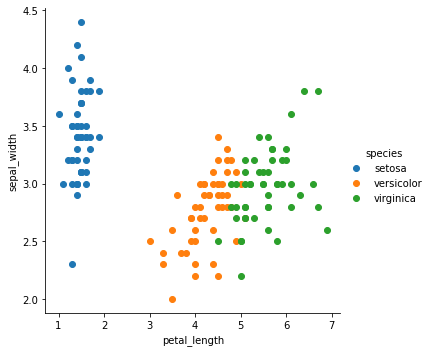

In [9]:
sns.FacetGrid(df,hue="species",size=5).map(plt.scatter,"petal_length","sepal_width").add_legend();
plt.show()

From the above graph, it has been observed that 'setosa' species can be separated using a linear line. However, 'versocolor' and 'virginica' cannot be separated with a linear line.

Multivariate Analysis

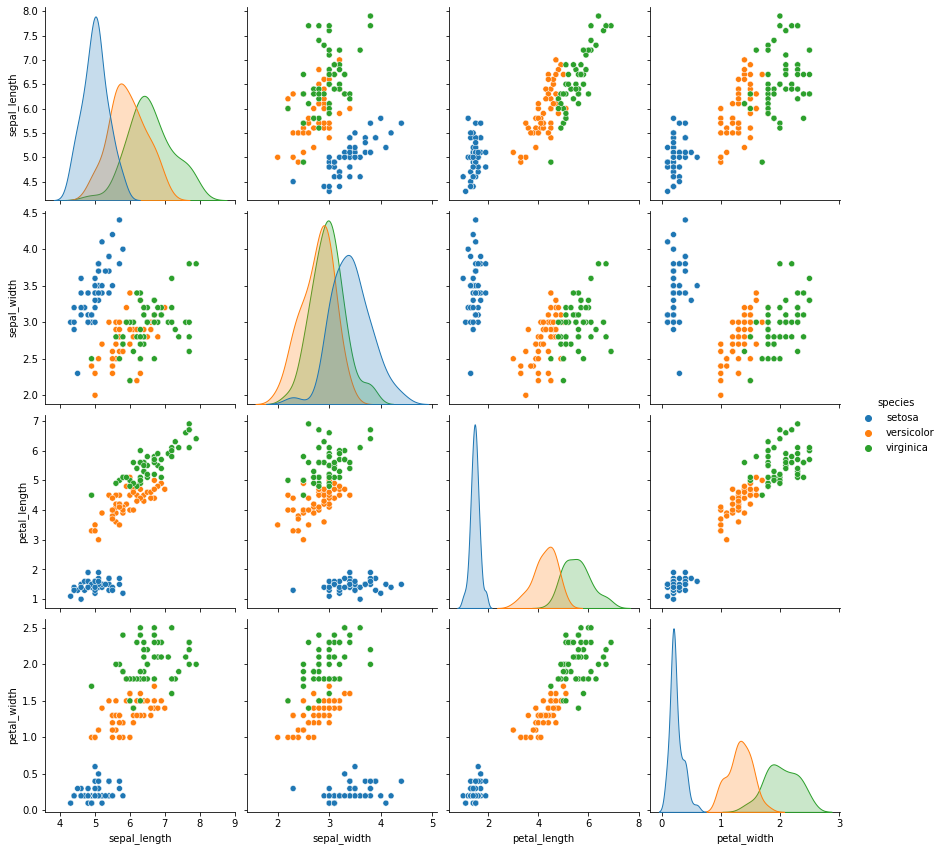

In [10]:
sns.pairplot(df,hue="species",size=3)

In [11]:
#Preparing the data for train_test_split
X=df.iloc[:,0:4]
y=df["species"]

Splitting the datasets into train and test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

Creating Decision Tree Classifier

In [13]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_predict = dtc.predict(X_test)

Evaluating Model Performance using Confusion Matrix

In [15]:
cm=confusion_matrix(y_test, y_predict)

In [16]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

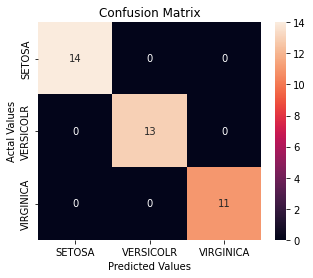

In [17]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


TP: The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.

FN: The sum of values of corresponding rows except the TP value

FN = (cell 2 + cell3)

= (0 + 0)

= 0

FP : The sum of values of corresponding column except the TP value.

FP = (cell 4 + cell 7)

= (0 + 0)

= 0

TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.

TN = (cell 5 + cell 6 + cell 8 + cell 9)

= 13 + 0 +0 + 11

= 24

Similarly, for Versicolor class the values/ metrics are calculated as below:

TP : 13 (cell 5)

FN : 0 + 0= 0 (cell 4 +cell 6)

FP : 0 + 0 = 0 (cell 2 + cell 8)

TN : 14 +0 +0 + 11 =25 (cell 1 + cell 3 + cell 7 + cell 9).

Visualizing the Decisiion Tree

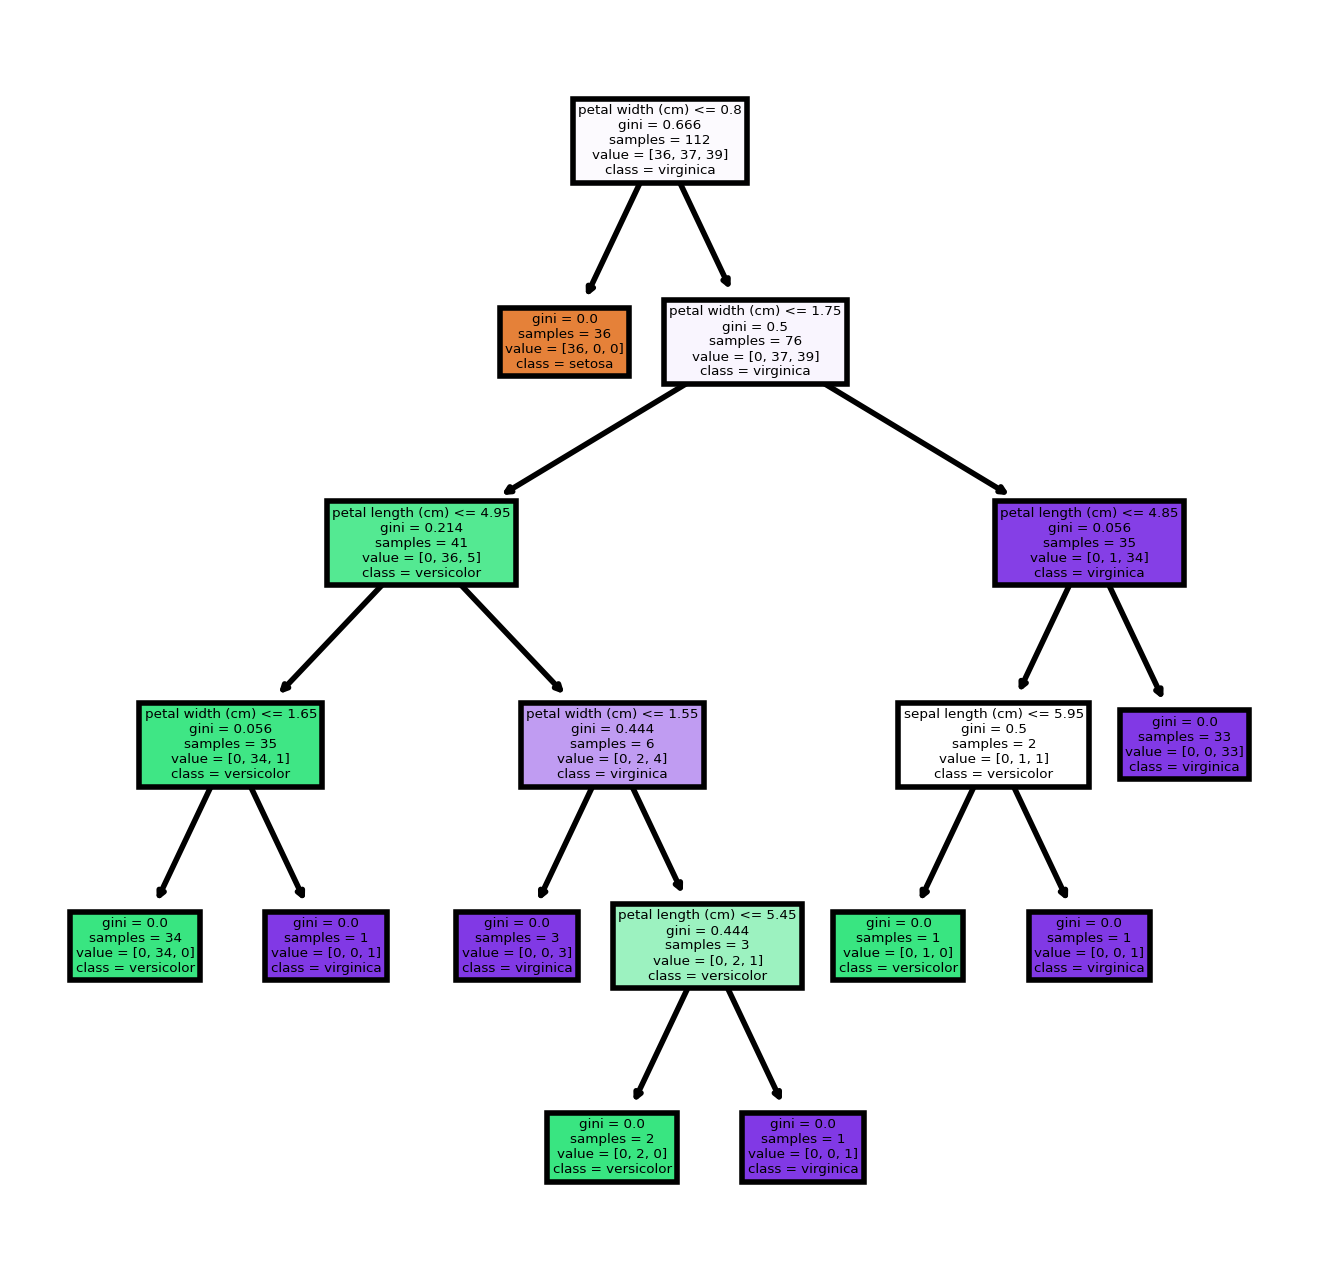

In [18]:
Features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
Class=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 400)

tree.plot_tree(dtc, feature_names = Features, class_names = Class, filled = True);